$\#\#\#\#\#\#\#$ Libraries $\#\#\#\#\#\#\#$

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import pipeline 
from scipy.cluster.hierarchy import dendrogram , linkage


from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from imblearn.over_sampling import SMOTE


import warnings

warnings.filterwarnings('ignore') 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

# Data

In [2]:
df = pd.read_csv('DelayedFlights_Mod.csv')

In [3]:
# Transforming data in cyclic for timestamp/timedate built-in functions. 
# we make use of the columns DepTime, CRSDepTime, ArrTime, CRSArrTime to know the hours for the date transformation.
# we can notice that afterwards we can drop these columns.
df['Year'] = 2008 # we add the column of year, previously erased, will be dropped afterwards.
df['DateDep'] = df.DepTime + df.DayofMonth*10000 + df.Month*1000000 + df.Year*100000000
df['DateCRSDep'] = df.CRSDepTime + df.DayofMonth*10000 + df.Month*1000000 + df.Year*100000000
df['DateArr'] = df.ArrTime + df.DayofMonth*10000 + df.Month*1000000 + df.Year*100000000
df['DateCRSArr'] = df.CRSArrTime + df.DayofMonth*10000 + df.Month*1000000 + df.Year*100000000

df.tail()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,VelocityAir,DelayedArr,TotalDelayed,TaxiTime,Year,DateDep,DateCRSDep,DateArr,DateCRSArr
1928363,1936753,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,22.0,369.795918,1,25.0,27.0,2008,2.008121e+11,200812131220,2.008121e+11,200812131552
1928364,1936754,12,13,6,657.0,600,904.0,749,DL,1631,...,0.0,227.244094,1,75.0,49.0,2008,2.008121e+11,200812130600,2.008121e+11,200812130749
1928365,1936755,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,79.0,255.185185,1,99.0,40.0,2008,2.008121e+11,200812130847,2.008121e+11,200812131010
1928366,1936756,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,0.0,278.086957,1,0.0,26.0,2008,2.008121e+11,200812131240,2.008121e+11,200812131437
1928367,1936757,12,13,6,1110.0,1103,1413.0,1418,DL,1641,...,0.0,426.341463,0,0.0,19.0,2008,2.008121e+11,200812131103,2.008121e+11,200812131418


In [4]:
# we also transform the categorical/object type variable
encode = LabelEncoder()
df['UCarrier_en'] = encode.fit_transform(df['UniqueCarrier'])
df['TailNum_en'] = encode.fit_transform(df['TailNum'])
df['Origin_en'] = encode.fit_transform(df['Origin'])
df['Dest_en'] = encode.fit_transform(df['Dest'])

df.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiTime,Year,DateDep,DateCRSDep,DateArr,DateCRSArr,UCarrier_en,TailNum_en,Origin_en,Dest_en
0,0,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,12.0,2008,2.008010e+11,200801031955,2.008010e+11,200801032225,17,3756,135,284
1,1,1,3,4,754.0,735,1002.0,1000,WN,3231,...,15.0,2008,2.008010e+11,200801030735,2.008010e+11,200801031000,17,4116,135,284
2,2,1,3,4,628.0,620,804.0,750,WN,448,...,20.0,2008,2.008010e+11,200801030620,2.008010e+11,200801030750,17,1948,140,48
3,3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,13.0,2008,2.008010e+11,200801031755,2.008010e+11,200801031925,17,2129,140,48
4,4,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,14.0,2008,2.008010e+11,200801031915,2.008010e+11,200801032110,17,3839,140,149


In [5]:
df.drop(['Unnamed: 0', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 
         'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'Year'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928368 entries, 0 to 1928367
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FlightNum          int64  
 1   ActualElapsedTime  float64
 2   CRSElapsedTime     float64
 3   AirTime            float64
 4   ArrDelay           float64
 5   DepDelay           float64
 6   Distance           int64  
 7   TaxiIn             float64
 8   TaxiOut            float64
 9   CarrierDelay       float64
 10  WeatherDelay       float64
 11  NASDelay           float64
 12  SecurityDelay      float64
 13  LateAircraftDelay  float64
 14  VelocityAir        float64
 15  DelayedArr         int64  
 16  TotalDelayed       float64
 17  TaxiTime           float64
 18  DateDep            float64
 19  DateCRSDep         int64  
 20  DateArr            float64
 21  DateCRSArr         int64  
 22  UCarrier_en        int64  
 23  TailNum_en         int64  
 24  Origin_en          int64  
 25  Dest_en           

> Note: For this exercise until necessary we will be using all columns of the dataset, even thought we know that date columns, time columns, and the categorical (but DelayedArr) are independent of the all the others, thus not very interesting for this dataset. 

# Nivell 1

## Exercici 1: Agrupa els diferents vols utilitzant l'algorisme de K-means.


We make a copy of the original dataset before continuing, since the algorithm K-means will modify it quantitively.

In this exercise we will approach the K-Means algorithm in differents ways, one to group the flights by similarity to each other, the second way, like a classifier algorithm (KNeighobours), to cluster the flights if they have been late or earlier/in time and use it as predictor.

In [7]:
df2 = df.copy()

In [8]:
df2.columns

Index(['FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'VelocityAir', 'DelayedArr', 'TotalDelayed', 'TaxiTime', 'DateDep',
       'DateCRSDep', 'DateArr', 'DateCRSArr', 'UCarrier_en', 'TailNum_en',
       'Origin_en', 'Dest_en'],
      dtype='object')

**Naive Clustering**

Before begining with the clustering, we need to know how many clusters we need for our system. To do so, we will use the Elbow method techinque.

The Elbow method, it consists in seeing which is the integer that reduces the Sum of Squares distances to the closest centroids (intertia_ function on k-means algorithm), i.e., the integer that is tangent to the curve.

In [12]:
# Elbow method to determine number of centroids needed.
# we set up a range to 15 clusters, although we have 26 features, we supose we don't need this much resolution.
#
elbow = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df2)
    elbow.append(kmeans.inertia_)

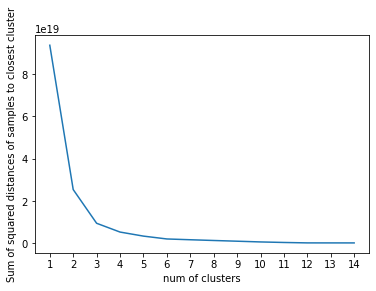

In [13]:
# figure of elbow method:
x = range(1,15)
plt.plot(x, elbow)
plt.xlabel('num of clusters')
plt.ylabel('Sum of squared distances of samples to closest cluster')
plt.xticks(x)
plt.show()

The elbow method tells us that the optimal number of clusters i where the curve changes its slope (the tangent). In this case it corresponds to the value 3, thus we will use k-means method for three clusters.

We do the same but know using Silhoutte score, we need to take into account that the computational time of this score increases exponentially as the system grows and we increase the number of clusters [S11T02](https://github.com/isaura-o/ITAcademia/blob/main/Sprint11/S11T02_Supp_Material.ipynb).

In [55]:
# we take a 10% of the sample (Silhoutte takes around 107 seconds to calculate it for 100000 points.)
dfsamp = df2.sample(frac=0.1)

In [56]:
ScSil = []
for i in range(2,6):
    
    kmeans = KMeans(n_clusters=i, random_state=42).fit(dfsamp)
    labels = kmeans.labels_ 
    
    ScSil.append(metrics.silhouette_score(dfsamp, labels, metric='euclidean'))


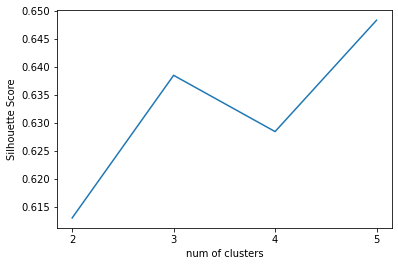

In [62]:
# figure of Silhouette score:
x = range(2,6) # remember that while range is 2 to 6 means that we get 2 to 5 !!!
plt.plot(x, ScSil)
plt.xlabel('num of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

Silhoutte Score ranges from $[-1,1]$, where 1 indicates that the clusters are dense and well seperated and 0 means that the clusters are overlapping. Negatives values indicate that the clusters had wrong or incorrect data, points that don't belong to them.

In the graph above, we can see that the values of the clusters are around 0.6-0.65 indicating that we have clusters more or less dense and separated, but just. Even more, the higher score is for 5 clusters, which is around 0.65. Thus the most optimal number of clusters for this system is 5. But in the exploration of the dataset below we will use the third best cluster number, 3, since the Elbow method has deemed it more appropiate.

Let's calculate the distances to the centroids of the clusters with all columns of the dataset, in which the only treatment has been relabel the object type data.

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df2)

In [18]:
# labels:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [19]:
# centroids 
kmeans.cluster_centers_

array([[2.20143948e+03, 1.32613667e+02, 1.33196130e+02, 1.07805733e+02,
        4.22845818e+01, 4.28670389e+01, 7.54855843e+02, 6.73776840e+00,
        1.80701657e+01, 1.26000512e+01, 2.35312580e+00, 9.26490492e+00,
        6.29179641e-02, 1.67544085e+01, 3.13414144e+02, 9.11853455e-01,
        4.10354084e+01, 2.48079341e+01, 2.00802604e+11, 2.00802604e+11,
        2.00802604e+11, 2.00802604e+11, 1.11497788e+01, 2.67330678e+03,
        1.48179278e+02, 1.51314042e+02],
       [2.14167964e+03, 1.34981769e+02, 1.35748522e+02, 1.09548100e+02,
        4.32473799e+01, 4.40141329e+01, 7.82275234e+02, 6.82033952e+00,
        1.86133303e+01, 1.25130335e+01, 2.53045317e+00, 1.04747137e+01,
        5.84491821e-02, 1.63238860e+01, 3.17808229e+02, 9.12611842e-01,
        4.19005356e+01, 2.54336699e+01, 2.00806665e+11, 2.00806665e+11,
        2.00806665e+11, 2.00806665e+11, 1.11114458e+01, 2.70249079e+03,
        1.45374750e+02, 1.49290050e+02],
       [2.21840500e+03, 1.31989952e+02, 1.33499139e+02

In [20]:
df2['Centroid_KM'] = kmeans.predict(df2)

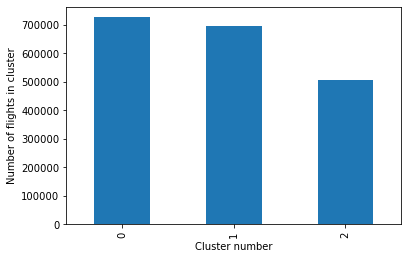

In [21]:
pd.Series(df2['Centroid_KM']).value_counts().plot.bar()
plt.xlabel('Cluster number')
plt.ylabel('Number of flights in cluster')
plt.show()

Next, to see more of the power of clustering, now we reduce the dimensionality of our dataset. We will use PCA to reduce its dimensionality, to 2 dimensions, and we only will use features that are not categorical. Since PCA usually aims to answer a question, as: is the flight late or not, the categorical features would have need to be normalized like on get_dummies, but since most of them are not dependent of the delay of a flight we will extract them.

We also use a new dataset, since the last has been modified by KMeans.

In [22]:
df3 = df.copy()

In [23]:
df3.columns

Index(['FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'VelocityAir', 'DelayedArr', 'TotalDelayed', 'TaxiTime', 'DateDep',
       'DateCRSDep', 'DateArr', 'DateCRSArr', 'UCarrier_en', 'TailNum_en',
       'Origin_en', 'Dest_en'],
      dtype='object')

In [24]:
df3.drop(['FlightNum', 'DateDep', 'DateCRSDep', 'DateArr', 'DateCRSArr', 'UCarrier_en', 'TailNum_en', 'Origin_en', 
         'Dest_en'], axis=1, inplace=True)
df3.columns

Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'VelocityAir', 'DelayedArr', 'TotalDelayed', 'TaxiTime'],
      dtype='object')

In [25]:
X = df3.drop('DelayedArr', axis = 1)
X.columns

Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'VelocityAir', 'TotalDelayed', 'TaxiTime'],
      dtype='object')

In [26]:
# reduces the system to a 2-d, do pipeline to reduce system:
pipe1 = pipeline.Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

dpca = pipe1.fit_transform(X)
dpca.shape

(1928368, 2)

In [27]:
# now we run KMeans:
kmeans = KMeans(n_clusters=3, random_state=42).fit(dpca)
label = kmeans.predict(dpca)

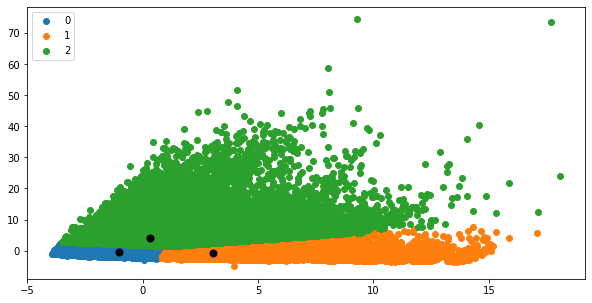

In [28]:
# graph with the labels:
nlabels = np.unique(label)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(dpca[label == i , 0] , dpca[label == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend()
plt.show()

This figure is how the 3 clusters look like on our data, we can see that the cluster are overlapping. Looking at the graph we cannot say which flights correspond to each cluster, the k-means algorithm only shows us the observations are similar to each other, when we pick 3 clusters only, since there is overlapping.

**Using K-Means as predictor**

Now we will twist the problem a bit more, we will use the K-Means algorithm to predict if a flight has been late or not, as we had done in the last sprints.

Now we will separate the dataset into 2 clusters, since we are only interested in late/early&onTime arrivals. 

To do so, the methodology is very similar, we will define our variables X and y, and then do the prediction with the algorithm. We do not need to split in train/test since we do need to train the algorithm before it does the classification into clusters.

> Note we take into account that we are using ArrDelay and DepDelay columns if not the KMeans algorithm will have a hard time trying to infer correctly the delayed. To see results: [S11T02](https://github.com/isaura-o/ITAcademia/blob/main/Sprint11/S11T02_Supp_Material.ipynb) (Supp material).

Since the number of clustering we will use will not change for the three subexamples below, we can define the kMeans here:

In [9]:
# first we use a new copy!
df4 = df.copy()

In [10]:
# Drop the categorical values for X:
df4.drop(['FlightNum', 'DateDep', 'DateCRSDep', 'DateArr', 'DateCRSArr', 'UCarrier_en', 'TailNum_en', 'Origin_en', 
         'Dest_en'], axis=1, inplace=True)
df4.columns

Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'VelocityAir', 'DelayedArr', 'TotalDelayed', 'TaxiTime'],
      dtype='object')

In [11]:
df4.shape

(1928368, 17)

In [12]:
# 2 cluster kmeans:
kmeans2 = KMeans(n_clusters=2, random_state=42)

*Dataset non scaled*

In [13]:
# Define the variables X and y
X = np.array(df4.drop(['DelayedArr'], axis=1))
y = np.array(df4['DelayedArr']).reshape(-1,1) 

In [14]:
# do the fitting with X_Train:
knsc = kmeans2.fit_transform(X)

# first fitting to train algorithm:
labelNS = kmeans2.predict(X)

# compare:
# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
print('Accuracy:', metrics.accuracy_score(y, labelNS))
print('adjusted rand score: ', metrics.adjusted_rand_score(y.ravel(), labelNS.ravel()))
print('normalized MI:', metrics.normalized_mutual_info_score (y.ravel(), labelNS.ravel()))
print(metrics.classification_report(y.ravel(), labelNS))

print('\n\n')
pd.crosstab(y.ravel(), labelNS, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.7815468831675282
adjusted rand score:  0.07501869770593164
normalized MI: 0.014526589544144016
              precision    recall  f1-score   support

           0       0.16      0.33      0.22    177916
           1       0.92      0.83      0.87   1750452

    accuracy                           0.78   1928368
   macro avg       0.54      0.58      0.54   1928368
weighted avg       0.85      0.78      0.81   1928368






Predicted,0,1,All
True,,,
0,58001,119915,177916
1,301343,1449109,1750452
All,359344,1569024,1928368


The accuracy tells us that doesn't seem that the data has been inferred randomly, that it has found some pattern, but the adjusted rand index is very low, which means that the labelling may be done randomly, but because of the accuracy we may suspect that the labeling it is independent of the data we feed the algorithm.

We can see that while it can't predict well the earlier arrivals, and the accuracy points that the algorithm works mostly random. Even if it has predicted a $33\%$ as delayed when it was earlier/on time, it has very low precision-recall. 

The algorithm as it is able to infer correcty mostly of the delayed flights and has a low score of not well predicted delays, it is why the precision-recall scores are high for delays inferred.

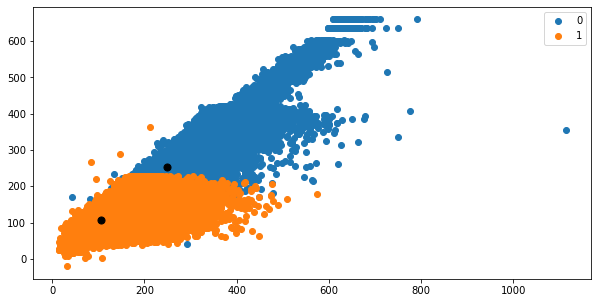

In [17]:
# graph with the labels:
nlabels = np.unique(labelNS)
centroids = kmeans2.cluster_centers_

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(X[labelNS == i , 0] , X[labelNS == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend()
plt.show()

In this figure we can see that label 0 and label 1 are overlapping which indicates the high values incorrectly inferred as delayed flights when they might be on time. Also, we found orange points on blue zone and vice versa, indicating that even if the flight had the caracteristics of being a delay(or earlier) the algorithm has not take it into account.

We want to check if the algorithm might have inferred label 0 as the delayed flights and with label 1 the flights on time. Has the algorithm mixed the values?

In [62]:
# algorithm analysis taking into account that now 0 is 1 and 1 is 0 (aka 0 is delay, 1 is on time)
ilabelNS = 1 - labelNS

# compare:
# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
print('Accuracy:', metrics.accuracy_score(y, ilabelNS))
print('adjusted rand score: ', metrics.adjusted_rand_score(y.ravel(), ilabelNS.ravel()))
print(metrics.classification_report(y.ravel(), ilabelNS))
print('\n\n')
pd.crosstab(y.ravel(), ilabelNS, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.21845311683247182
adjusted rand score:  0.07501869770593164
              precision    recall  f1-score   support

           0       0.08      0.67      0.14    177916
           1       0.84      0.17      0.29   1750452

    accuracy                           0.22   1928368
   macro avg       0.46      0.42      0.21   1928368
weighted avg       0.77      0.22      0.27   1928368






Predicted,0,1,All
True,,,
0,119915,58001,177916
1,1449109,301343,1750452
All,1569024,359344,1928368


If the values had been mixed, then the algorithm has troubles to infer the delays, precision low, but also it has troubles to correctly determine if a flight has been on time/earlier. In this case the accuracy has decrease quantetively but the adjusted rand score is the same (this score is only evaluating the performance of the data in 2 clusters).

Actually, this analysis doesn't give us any information if the data with label 0 is late or is on time and viceversa.

*Dataset scaled*

In [18]:
df4.shape

(1928368, 17)

In [19]:
# Define the variables X and y
X = np.array(df4.drop(['DelayedArr'], axis=1))
y = np.array(df4['DelayedArr']).reshape(-1,1) 

In [20]:
X.shape

(1928368, 16)

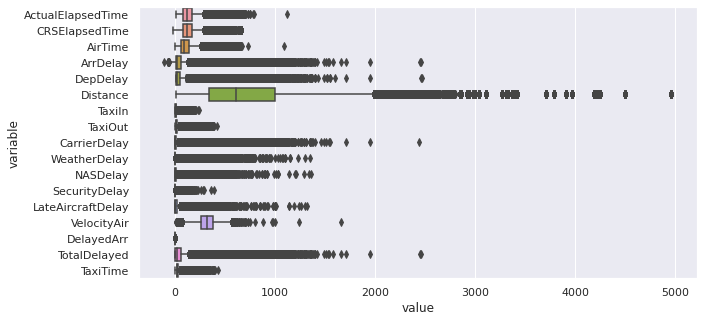

In [53]:
# we want to take a look at the outliers to see if we can use MinMaxScaler or better use RobustScaler.
data = pd.melt(df4)

sns.set(rc={"figure.figsize":(10, 5)})
sns.boxplot(data=data, y='variable', x='value')
plt.show()

We see that the outliers are important in all the non categorical variables, we need a scaler that is agressive enough to treat this data and that not only changes the scale (we may found that there is inconsistencies with the scaled values, like in distances, if we only apply a change of scale), for this we will use RobustScaler instead of MinMaxScaler or StandardScaler.

In [21]:
# Use robust scaler to scale:
X_scaled = RobustScaler().fit_transform(X)

In [22]:
# do the fitting:
dfsc = kmeans2.fit_transform(X_scaled)

# predict:
labelS = kmeans2.predict(X_scaled)

# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
print('Accuracy:', metrics.accuracy_score(y, labelS))
print('adjusted rand score: ', metrics.adjusted_rand_score(y.ravel(), labelS.ravel()))
print('normalized MI:', metrics.normalized_mutual_info_score (y.ravel(), labelS.ravel()))
print(metrics.classification_report(y.ravel(), labelS))
print('\n\n')
# compare the real:
pd.crosstab(y.ravel(), labelS, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.1023342017706164
adjusted rand score:  -0.016392587790186305
normalized MI: 0.005384290484556598
              precision    recall  f1-score   support

           0       0.09      1.00      0.17    177916
           1       1.00      0.01      0.02   1750452

    accuracy                           0.10   1928368
   macro avg       0.55      0.51      0.10   1928368
weighted avg       0.92      0.10      0.04   1928368






Predicted,0,1,All
True,,,
0,177916,0,177916
1,1731030,19422,1750452
All,1908946,19422,1928368


Now the algorithm is unable to predict the delayed flights, it predicts around a $65\%$ correctly earlier flights correctly, but only infers a $1\%$ of the delays correctly. 
The precision is very low for the earlier flights while the recall is low for delays. We have more false negatives than true negatives.

The accuracy has decrase quantitavely, pointing that the KMeans it is not a good tool to do predictions, also that it would have been better using more clusters, the cluster performance is below zero, the labelling may be random without taking into account the data very well, we might not want to use KMeans for predicting in this case.

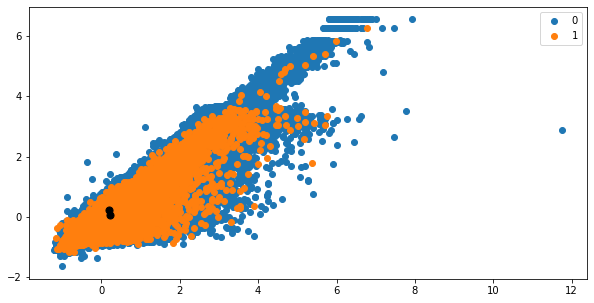

In [23]:
# graph with the labels:
nlabels = np.unique(labelS)
centroids = kmeans2.cluster_centers_

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(X_scaled[labelS == i , 0] , X_scaled[labelS == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend()
plt.show()

As we can see in the figure above, scaling only has only made that there are more false negatives values, thus, the algorithm fails into classifying well the data. The centroids are nearly at the same coordinates, thus the algorithm cannot distinguish very well if one it is a delay or not.

Let's make the same assumption than before. Have be had been reading the results of the algorithm wrong?

In [71]:
# algorithm analysis taking into account that now 0 is 1 and 1 is 0 (0 is delay, 1 on time)
ilabelS = 1 - labelS

# compare:
# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
print('Accuracy:', metrics.accuracy_score(y, ilabelS))
print('adjusted rand score: ', metrics.adjusted_rand_score(y.ravel(), labelS.ravel()))
print(metrics.classification_report(y.ravel(), ilabelS))
print('\n\n')
pd.crosstab(y.ravel(), ilabelS, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8976657982293836
adjusted rand score:  -0.016392587790186305
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    177916
           1       0.91      0.99      0.95   1750452

    accuracy                           0.90   1928368
   macro avg       0.45      0.49      0.47   1928368
weighted avg       0.82      0.90      0.86   1928368






Predicted,0,1,All
True,,,
0,0,177916,177916
1,19422,1731030,1750452
All,19422,1908946,1928368


If we had been reading the labels wrong, this algorithm performs worse than before, even if the accuracy now is high. This is because the precision and recall for the delays is 0, looking at the table above we can see that there are NONE flights late, thus now we know that the correct way to look at the labels is the same as we had done before: 0 is for earlier/on time and 1 is for late.

*Dataset scaled and dimension reduced (PCA)*

We part from X and y scaled and we do the scaling with robust scaler, and the dimensionality reduction with PCA:

In [24]:
X.shape

(1928368, 16)

In [25]:
y.shape

(1928368, 1)

In [26]:
# reduces the system to a 2-d, do pipeline to reduce system:
pipe2 = pipeline.Pipeline([('scaler', RobustScaler()), ('pca', PCA(n_components=2))])

dSpca = pipe2.fit_transform(X)
dSpca.shape

(1928368, 2)

In [27]:
# do the fitting with X_Train:
dfPsc = kmeans2.fit_transform(dSpca)

# first fitting to train algorithm:
labelPS = kmeans2.predict(dSpca)

# score: we will use accuracy score, since it counts straighforward the values correctly inferred.
print('Accuracy:', metrics.accuracy_score(y, labelPS))
print('adjusted rand score: ', metrics.adjusted_rand_score(y.ravel(), labelPS.ravel()))
print('normalized MI:', metrics.normalized_mutual_info_score (y.ravel(), labelPS.ravel()))
print(metrics.classification_report(y.ravel(), labelPS))
print('\n\n')

# confusion matrix the real:
pd.crosstab(y.ravel(), labelPS, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.10256496685279988
adjusted rand score:  -0.016731535205308297
normalized MI: 0.005492397551438736
              precision    recall  f1-score   support

           0       0.09      1.00      0.17    177916
           1       1.00      0.01      0.02   1750452

    accuracy                           0.10   1928368
   macro avg       0.55      0.51      0.10   1928368
weighted avg       0.92      0.10      0.04   1928368






Predicted,0,1,All
True,,,
0,177916,0,177916
1,1730585,19867,1750452
All,1908501,19867,1928368


As in the scaled case performance is really low, the algorithm is unable to infer correctly the delayed flights, only a $1\%$ has been correctly inferred, and overstimates, another time the on time/earlier flights.

The accuracy is low, and the cluster performance coefficient has below zero value, meaning that would be better to clusterize more the dataset.

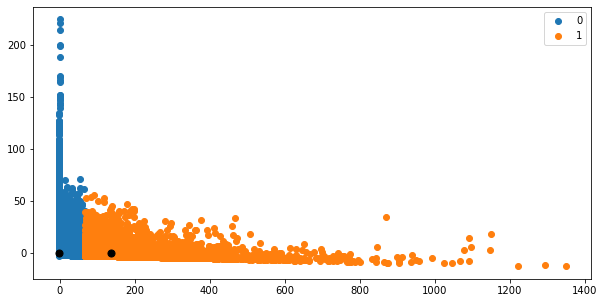

In [28]:
# graph with the labels (test set):
nlabels = np.unique(labelPS)
centroids = kmeans2.cluster_centers_

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(dSpca[labelPS == i , 0] , dSpca[labelPS == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend()
plt.show()

In this figure we can see another time that the two clusters are overlapped, and in this case the centroids while are separated its coordinates are very similar, meaning that the data is very dependent on each other and the algorithm cannot define correctly the clusters, when we are using it as predictor.

This figure as the one above (standarization without PCA) are the same if we are using the feature 'ArrDelay' or not.

**Summary**

The K-Means as it is a good graphical representation to clusterize the data **but** it **is not** an accurate predictor, we have seen that the normalized MI score is nearly zero (remember: MI = 0 variable independents), thus the labelling the algorithm did was independent or random. To predict a class for a dataset we may use other classification algorithms as KNeighbours, Decision Tree or Suport Vector Classifier.

It looks also, that adding the column 'ArrDelay' only affects to the non scaled result, the other two cases the correctly inference is very low, it is the same as not adding 'ArrDelay'. Also, standarizing the dataset has also decrease the correctly predition of the delay, in this exercise we have choose to use RobustScaler because of the outliers, if they weren't that importants as we have seen, we could have use instead StandardScaler or MinMaxScaler. See [S11T02](https://github.com/isaura-o/ITAcademia/blob/main/Sprint11/S11T02_Supp_Material.ipynb) for results with robust scaler without the column 'ArrDelay'.

> results of the predictions:

$$\begin{array}{| c | c |}
\hline
\mbox{Data} & \mbox{Accuracy Score} (\%) \\
\hline
\mbox{Non Scaled} & 78.15 \\
\mbox{Scaled} & 10.23 \\
\mbox{PCA Scaled} & 10.26 \\
\hline
\end{array}$$


# Nivell 2

## Exercici 2: Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

An hierarchical clustering algorithm by definition it is the denodrogram. Although when we talk about hierarchical clusters we need to take into account two types of them:

* Agglomerative: each observation starts its own cluster.
* Divisive: all observations start on the same cluster and then splits recursively branching out.

The divisive case it is the typical dendrogram, which we will use next to do our bit of analysis.

For Agglomerative function see [S11T02](https://github.com/isaura-o/ITAcademia/blob/main/Sprint11/S11T02_Supp_Material.ipynb).

In [6]:
df5 = df.copy()

Since a dendrogram is a way to cluster from "top" to "bottom", i.e., all the data is in one cluster and then it branches (like a tree) down, we can use it like we have done with the networks in the sprints before this one, to see how the features are related between each other.

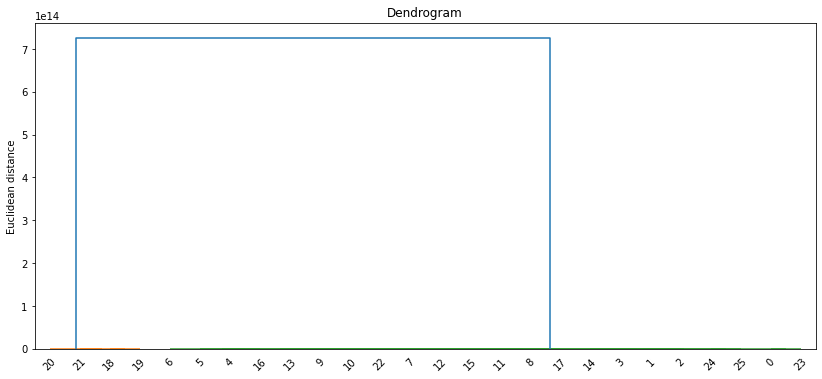

In [23]:
# We want to take a look how the features, transpose the matrix to get how they are related!
# links for dendrogram
Z = linkage(df5.T, method = 'ward')
 
#plotting dendrogram
plt.figure(figsize=(14,6))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

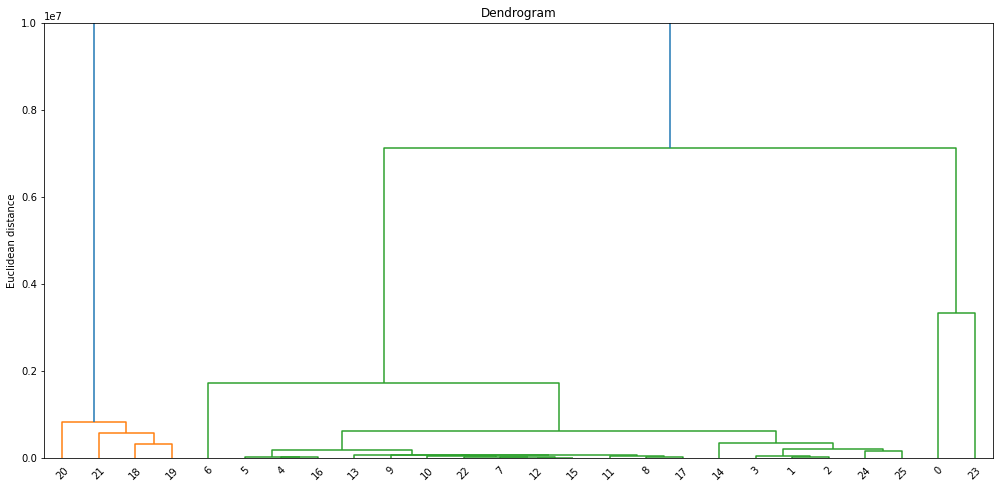

In [29]:
#plotting dendrogram
plt.figure(figsize=(17,8))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.ylim(0, 1e7)
plt.show()

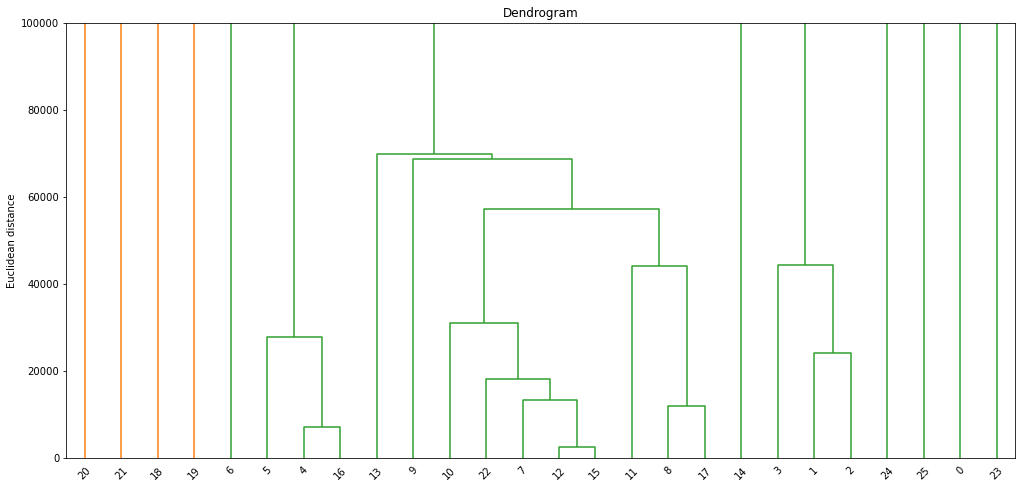

In [30]:
#plotting dendrogram
plt.figure(figsize=(17,8))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.ylim(0, 1e5)
plt.show()

The images above are a zoom in on the features, we can see that there are "two" main clusters, one in orange, one in green. 

The orange one if formed for the features 18 to 21, they correspond to dates (arrival, depart, and the CRS correspondent ones). 

The green cluster has all the other features but taking a first look we can see that there are 3 indepedent features over all, these are the 0 and 23, which are one at each others sides because of they similiarity, in fact they correspond to the Flight Number and Tail Number, that seems they to be somewhat related.

Now we take a look at the other two big clusters inside of the green cluster, in which 6 (Distance) belongs to both, the second one contains the 14, VelocityAir, which is related but independent enough of the two other small clusters: ActualElapsedTime/CRS and AirTime (cluster: 3, 1, 2) and Origin/Destination (cluster: 24 and 25). The last cluster, which it is the bigger one, has two principal separations: one with a cluster of 3 features, the other with the remainder of the features. The 3 feature cluster correspond to the features: DepDelay (5), ArrDelay and TotalDelayed (4 and 16). The largest one has the features: CarrierDelay (9), and LateAircraftDelay (13), then we have a cluster with the NASDelay (11), TaxiOut(8) and TaxiTime (17). Then there is the WeatherDealy (10), UniqueCarrier (22), TaxiIn (7), SecurityDelay (12) and DelayedArr (15).

We can see that the main components that determine the delay of flights are: WeatherDelay, Carrier, SecurityDelay and DelayedArr, together with CarrierDelay, LateAircraft, DepDelay, ArrDelay, TotalDelay, Origin, Destination, ElapsedTime/CRS, AirTime, VelocityAir. We can see that the dendrogram results differs a bit from the networks we inferred (see exercise 3 for network), when we thresholded the network to obtain the most strong links SecurityDelay was one that was considered not important enough but the Distance was considered to be more important in order to determine the delaying.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928368 entries, 0 to 1928367
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FlightNum          int64  
 1   ActualElapsedTime  float64
 2   CRSElapsedTime     float64
 3   AirTime            float64
 4   ArrDelay           float64
 5   DepDelay           float64
 6   Distance           int64  
 7   TaxiIn             float64
 8   TaxiOut            float64
 9   CarrierDelay       float64
 10  WeatherDelay       float64
 11  NASDelay           float64
 12  SecurityDelay      float64
 13  LateAircraftDelay  float64
 14  VelocityAir        float64
 15  DelayedArr         int64  
 16  TotalDelayed       float64
 17  TaxiTime           float64
 18  DateDep            float64
 19  DateCRSDep         int64  
 20  DateArr            float64
 21  DateCRSArr         int64  
 22  UCarrier_en        int64  
 23  TailNum_en         int64  
 24  Origin_en          int64  
 25  Dest_en           

Now, we will do the same for the "rows" of the dataset (points). Although this time we will pick only a subset to see how are they related to each other, since the computer cannot represent graphically that many points.

In [83]:
df5sam = df.sample(10000)

In [87]:
# data dendrogram
Z = linkage(df5sam, method = 'ward')

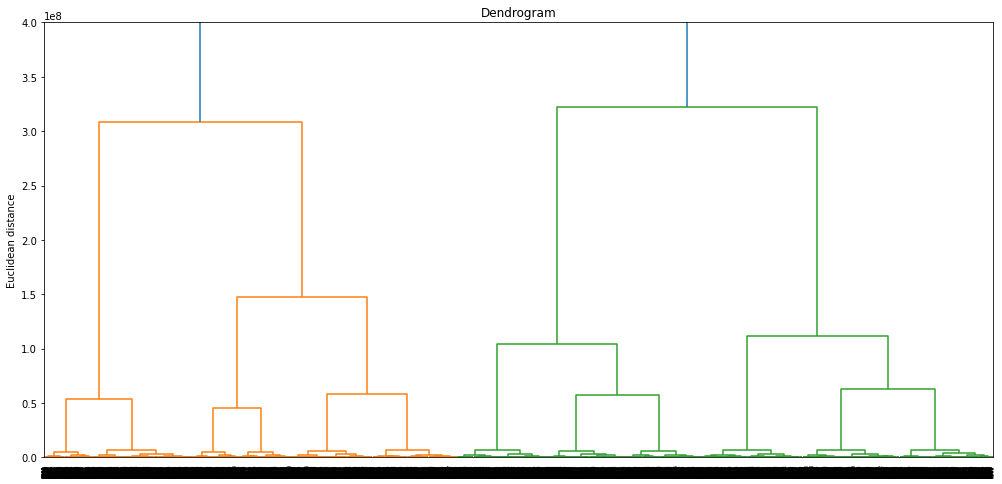

In [86]:
#plotting dendrogram
plt.figure(figsize=(17,8))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.ylim(0,4e8)
plt.show()

The dendrogram shows two distinct trees, one in green one in orange. We may supose that they are the delays the green tree, since it is bigger (more than half of the graph) and we know that our data is unbalanced towards the delays. We can supose also, that the orange it is the on time/early arrivals.

Taking a subsample of 100 observations, we can see in the figure below, that the flights have very similar characteristics within a same cluster. For the orange (on time flights) there are three main subclusters, while for the green (delays) there are 4 big subclusters within to 3 subclusters, which indicates that while the data whithin the leaf is similar between themselves, if didn't have the column DelayedArr (binary/categorical) the algorithm might had a bit of problems to determine the two big hierarchies.

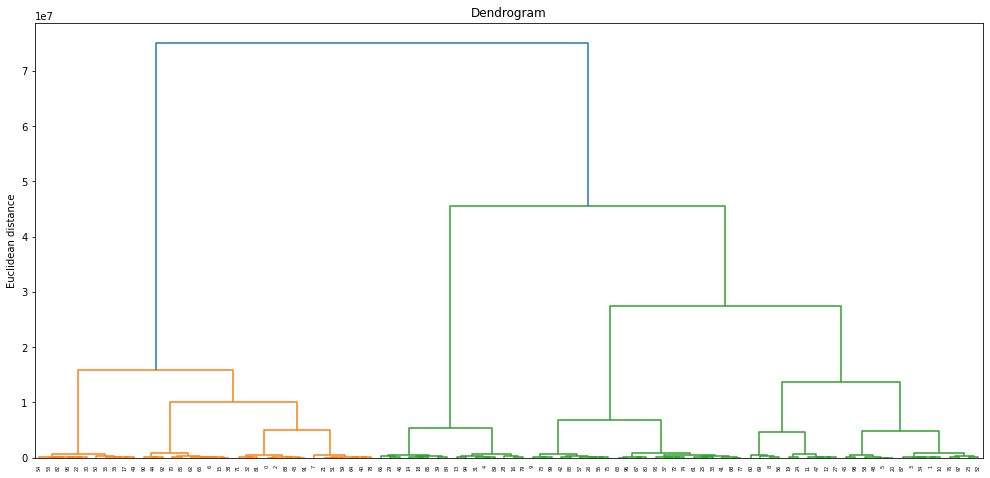

In [97]:
df5sam = df.sample(100)
Z = linkage(df5sam, method = 'ward')

#plotting dendrogram
plt.figure(figsize=(17,8))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

# Nivell 3

## Exercici 3: Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

There are different tools to avaluate the cluster performance in sklearn, we have seen in exercise 1 & [S11T02](https://github.com/isaura-o/ITAcademia/blob/main/Sprint11/S11T02_Supp_Material.ipynb) that there is the elbow method and the silhoutte coefficient, another type of performance coefficient it is the adjusted rand index (score) that we have used in exercise 1 when we have used KMeans as a predictor, to see if the labelling was random/independent or not. Some others performance evaluators are:

* Normalized Mutual Information: normalized_mutual_info_score (labels_true, labels_pred)
* Adjusted Mutual Information: adjusted_mutual_info_score (labels_true, labels_pred)
* Fowlkes-Mallows Score: fowlkes_mallows__score (labels_true, labels_pred)

In the documentation of the Silhouette score in [sklearnWeb](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) there are only few parameters to tinker with, like the sample size or the random seed. In this case we will choose to tinker with the sample size and the number of clustering, from kMeans, which indirectly changes the labels. The metric, we want euclidian since we are not in any special space or wanting only the pairwise distances. This exercise will be similar to the one done to calculate the computational time that is on the supplemental material [S11T02](https://github.com/isaura-o/ITAcademia/blob/main/Sprint11/S11T02_Supp_Material.ipynb), this is why we will choose the maximum size of the system at 50000 points.


In [15]:
n = [1000, 5000, 10000, 50000]
clus = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

ScSil = np.zeros((13,4))
for i in range(0,len(clus)):
    
    kmeans = KMeans(n_clusters=clus[i], random_state=42).fit(df)
    labels = kmeans.labels_ 
    
    for j in range(0,len(n)):
        ScSil[i,j] = (metrics.silhouette_score(df, labels, metric='euclidean', sample_size=n[j], random_state=42))
        #print(j, i, ScSil)


In [16]:
ScSil

array([[0.61402585, 0.6095761 , 0.61343716, 0.61190664],
       [0.63530702, 0.63661249, 0.6369599 , 0.63849221],
       [0.63012901, 0.63110704, 0.62910706, 0.6272994 ],
       [0.64638881, 0.64873989, 0.64769813, 0.64843401],
       [0.65647141, 0.66079576, 0.66428864, 0.66608455],
       [0.68145753, 0.68270801, 0.68626782, 0.68762386],
       [0.67907847, 0.68627388, 0.68558587, 0.68749728],
       [0.7562791 , 0.75609709, 0.75836026, 0.75895541],
       [0.8156789 , 0.81431029, 0.81301801, 0.81421905],
       [0.84972811, 0.84811216, 0.84741033, 0.84715237],
       [0.89095225, 0.89154116, 0.89195743, 0.8914784 ],
       [0.86657046, 0.87105902, 0.86960829, 0.87040167],
       [0.84082499, 0.8458864 , 0.84435838, 0.84545903]])

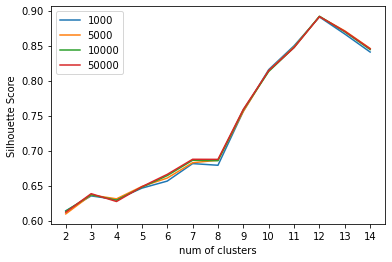

In [17]:
# figure of Silhouette score:
plt.plot(clus, ScSil[:,0], label = 1000)
plt.plot(clus, ScSil[:,1], label = 5000)
plt.plot(clus, ScSil[:,2], label = 10000)
plt.plot(clus, ScSil[:,3], label = 50000)

plt.xlabel('num of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(clus), max(clus)+1, 1.0))
plt.legend()
plt.show()

We can see that the Silhouette score considers that at least 10 clusters would represent better the system, in fact if we look at the figure of the Dendrogram (figure [x]) and at the network below, we can see, that this dataset has at least 9 distinct clusters (dendrogram) or 8 for network. Thus the if we had to do the kMeans analysis another time, we, instead, would we using 10 clusters to process the data.

Below the network there is the bit of analysis done. There had been dimension reduction with PCA but not standarizaton, since that way we take into account the categorical values.

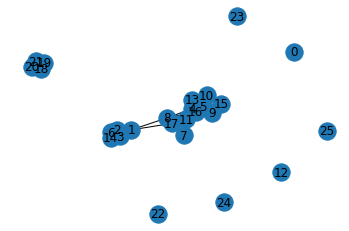

In [69]:
import networkx as nx
# 1. get adjacency matrix
corrdf = df.corr()
corrdfas = abs(corrdf)

# 2. Use a threshold to only keep the strongest links:
thres = corrdfas.std()
net = corrdf[(corrdf >= thres) & (corrdf != 1) ] # we don't want self links.
net[np.isnan(net)] = 0
net2 = np.array(net)

# 3. Map the network
G = nx.from_numpy_matrix(net2)

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_labels(G, pos)

nx.draw(G, pos)
plt.show()

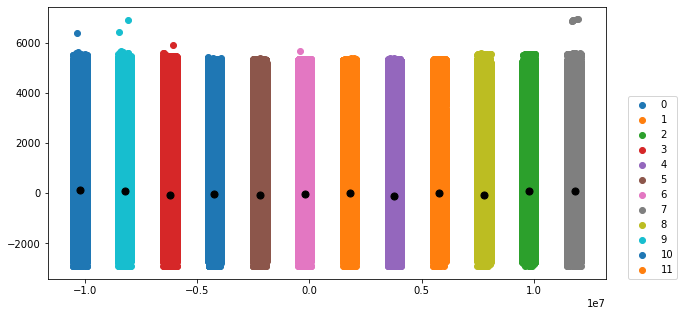

In [18]:
# 12 clusters analysis as Silhouette wants us to do!

dfPCA = PCA(n_components=2).fit_transform(df5)

kmeans = KMeans(n_clusters=12, random_state=42).fit(dfPCA)
label = kmeans.predict(dfPCA)

nlabels = np.unique(label)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 5))
for i in nlabels:
    plt.scatter(dfPCA[label==i, 0], dfPCA[label==i, 1], label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=50, color='k')
plt.legend(loc=(1.04,0))
plt.show()

The figure shows the clusters distinctily separated as stripes (this is cause we hadn't standarized the data), with its centroids nearly on the middle. We cannot tell which flights (points/rows) correspond to each cluster since we don't know which creterion has been used to determine which flight correspond to each centroid, but even if they seem equally distributed, when plotting the number of flights by cluster (figure below), we can see that clusters 7, 3, 6 have equal number of observations, followed by 9. The clusters with less observations are the 2, 8, 11.

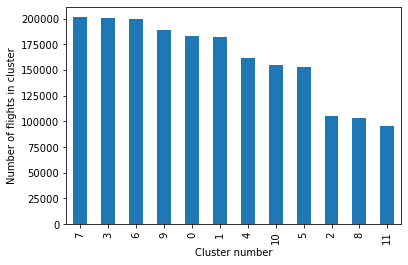

In [19]:
pd.Series(label).value_counts().plot.bar()
plt.xlabel('Cluster number')
plt.ylabel('Number of flights in cluster')
plt.show()